In [1]:
import pytesseract
import cv2
from matplotlib import pyplot as plt
import os
from transformers import pipeline, MarianMTModel, MarianTokenizer
%matplotlib inline

In [2]:
#path of the tesseract executable file, it should look like "C:\Program Files\Tesseract-OCR\tesseract.exe"
pytesseract.pytesseract.tesseract_cmd = os.environ['tesseract_exe_dir']
#path of the tessdata folder
tessdata_dir_config = f"--tessdata-dir {os.environ['tessdata_folder']}"

In [3]:
#path of the folder where the images are stored and the transformers translation packages will be stored
ocr_folder_path = os.path.dirname(os.path.realpath("__file__"))

In [4]:
def image_to_ocr_translation_online(img_path, src_lang):
    """
    ocr and translation with internet connection to download 
    the translation models
    img_path: the directory of image
    src_lang: the prefix of the image/source language i.e. chi, gre, ger
    """
    tesseract_lang = {"chi":"chi_sim", "gre":"ell", "ger":"deu"}
    transformers_lang ={"chi":"zh", "gre":"grk", "ger":"de"}
    
    image = cv2.imread(img_path)
    plt.imshow(image)
    plt.show()
    
    text = pytesseract.image_to_string(image, lang=tesseract_lang[src_lang], config="--psm 6")
    print('text from image:=================>', text)
    
    model_name = f'Helsinki-NLP/opus-mt-{transformers_lang[src_lang]}-en'
    #model_path = ocr_folder_path + fr"\pretrained_{transformers_lang[src_lang]}_to_eng"
    
    model = MarianMTModel.from_pretrained(model_name)
    model.save_pretrained(ocr_folder_path + fr"\pretrained_{transformers_lang[src_lang]}_to_eng")
    
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    tokenizer.save_pretrained(ocr_folder_path + fr"\pretrained_{transformers_lang[src_lang]}_to_eng")
    
    translated = model.generate(**tokenizer(text, return_tensors="pt", padding=True))
    translation = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]
    print('translated text from image:======>', translation[0])

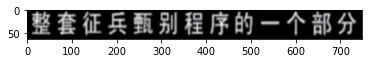

text from image:=================> 整 套 征 兵 甄 别 程 序 的 一 个 部 分

translated text from image:======> A part of the whole recruitment process.


In [5]:
#At these point we have downloaded the Tesseract models fro chinese, greek and german
image_path = ocr_folder_path + r"\demo_images\chi_demo_0.png"
#Use "chi" for recognising and translating chinese, "gre" for greek and "ger" for german
image_to_ocr_translation_online(image_path, "chi")

In [6]:
def image_to_ocr_translation_offline(img_path, src_lang):
    """
    ocr and translation with no internet connection using 
    the translation models downloaded from the previous method
    img_path: the directory of image
    src_lang: the prefix of the image/source language i.e. chi, gre, ger
    """
    tesseract_lang = {"chi":"chi_sim", "gre":"ell", "ger":"deu"}
    transformers_lang ={"chi":"zh", "gre":"grk", "ger":"de"}
    
    image = cv2.imread(img_path)
    plt.imshow(image)
    plt.show()
    
    text = pytesseract.image_to_string(image, lang=tesseract_lang[src_lang], config="--psm 6")
    print('text from image:=================>', text)
    
    model_path = ocr_folder_path + fr"\pretrained_{transformers_lang[src_lang]}_to_eng"
    
    model = MarianMTModel.from_pretrained(model_path)
    model.save_pretrained(ocr_folder_path + fr"\pretrained_{transformers_lang[src_lang]}_to_eng")
    
    tokenizer = MarianTokenizer.from_pretrained(model_path)
    tokenizer.save_pretrained(ocr_folder_path + fr"\pretrained_{transformers_lang[src_lang]}_to_eng")
    
    translated = model.generate(**tokenizer(text, return_tensors="pt", padding=True))
    translation = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]
    print('translated text from image:======>', translation[0])

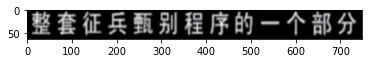

text from image:=================> 整 套 征 兵 甄 别 程 序 的 一 个 部 分

translated text from image:======> A part of the whole recruitment process.


In [7]:
image_path = ocr_folder_path + r"\demo_images\chi_demo_0.png"
image_to_ocr_translation_offline(image_path, "chi")